# Load and Inspect the Data

In [2]:
import pandas as pd

# Load data using pipe delimiter
df = pd.read_csv("../data/MachineLearningRating_v3.txt", delimiter='|')

# Quick overview
print(df.shape)
df.head()


C:\Users\addis\AppData\Local\Temp\ipykernel_25360\2596907104.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.txt", delimiter='|')


(1000098, 52)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


# Clean & Engineer KPIs

In [3]:
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')

df['HasClaim'] = df['TotalClaims'] > 0
df['ClaimFrequency'] = df['HasClaim'].astype(int)

df['ClaimCount'] = df['HasClaim'].astype(int)  # If there's a claim, count = 1
df['ClaimSeverity'] = df['TotalClaims'] / df['ClaimCount'].replace(0, pd.NA)

df['Margin'] = df['TotalPremium'] - df['TotalClaims']


# Hypotheses and Statistical Tests

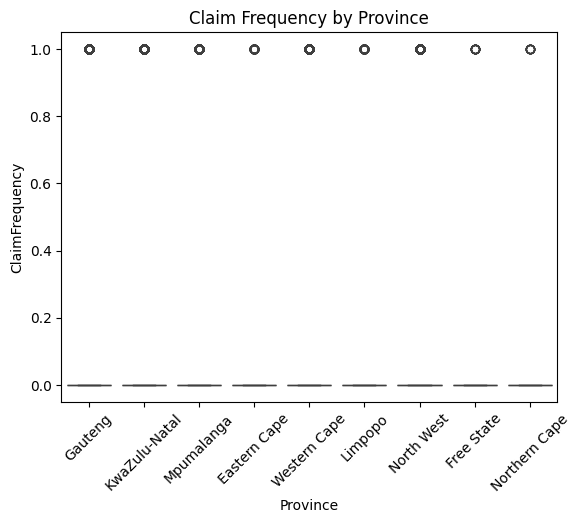

ANOVA result: F = 13.0251, p = 0.0000
Zipcode T-test result: T = -1.8696, p = 0.0615
Margin T-test: T = 1.1639, p = 0.2445
Gender Risk T-test: T = 0.2055, p = 0.8372


In [4]:
#Hypothesis 1: No risk differences across provinces
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
sns.boxplot(x='Province', y='ClaimFrequency', data=df)
plt.title("Claim Frequency by Province")
plt.xticks(rotation=45)
plt.show()

# ANOVA
from scipy.stats import f_oneway

province_groups = [g['ClaimFrequency'] for _, g in df.groupby('Province') if g['ClaimFrequency'].count() > 30]
stat, p = f_oneway(*province_groups)
print(f"ANOVA result: F = {stat:.4f}, p = {p:.4f}")


#Hypothesis 2: No risk differences between zip codes
top_zips = df['PostalCode'].value_counts().head(2).index
zip1, zip2 = top_zips[0], top_zips[1]

zipA = df[df['PostalCode'] == zip1]['ClaimFrequency']
zipB = df[df['PostalCode'] == zip2]['ClaimFrequency']

# T-test
from scipy.stats import ttest_ind
stat, p = ttest_ind(zipA.dropna(), zipB.dropna(), equal_var=False)
print(f"Zipcode T-test result: T = {stat:.4f}, p = {p:.4f}")


#Hypothesis 3: No margin difference between zip codes
zipA = df[df['PostalCode'] == zip1]['Margin']
zipB = df[df['PostalCode'] == zip2]['Margin']

stat, p = ttest_ind(zipA.dropna(), zipB.dropna(), equal_var=False)
print(f"Margin T-test: T = {stat:.4f}, p = {p:.4f}")


#Hypothesis 4: No significant risk difference between Women and Men
df['Gender'].value_counts()
male = df[df['Gender'] == 'Male']['ClaimFrequency']
female = df[df['Gender'] == 'Female']['ClaimFrequency']

stat, p = ttest_ind(male.dropna(), female.dropna(), equal_var=False)
print(f"Gender Risk T-test: T = {stat:.4f}, p = {p:.4f}")



# Visualizations 

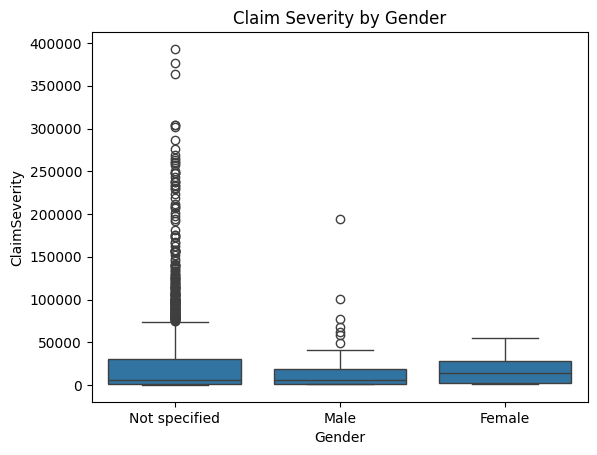

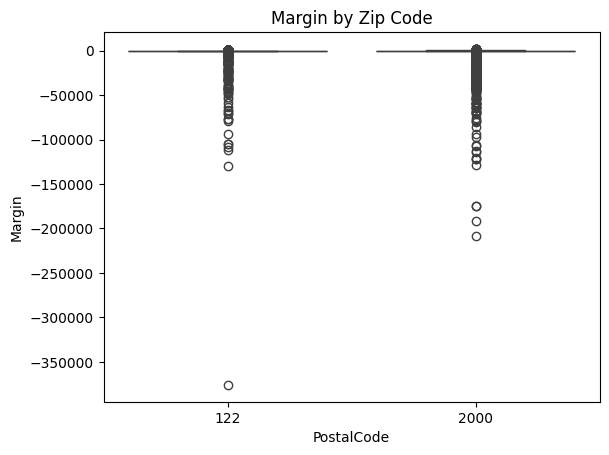

In [5]:
# Gender vs Claim Severity
sns.boxplot(x='Gender', y='ClaimSeverity', data=df)
plt.title("Claim Severity by Gender")
plt.show()

# Zipcode vs Margin
sns.boxplot(x='PostalCode', y='Margin', data=df[df['PostalCode'].isin(top_zips)])
plt.title("Margin by Zip Code")
plt.show()
